In [1]:
#Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
import statsmodels.graphics.tsaplots as sgt
from math import sqrt
import seaborn as sns
sns.set()

In [2]:
raw_csv_data = pd.read_csv('GOOG1.csv')
df_comp = raw_csv_data.copy()
#Converting Time
df_comp.Date = pd.to_datetime(df_comp.Date, dayfirst=True)
#Setting Date as an index
df_comp.set_index('Date', inplace=True)
#Setting Frequency as business working days
df_comp = df_comp.asfreq('b')
#Filling the Missing or Empty Values
df_comp = df_comp.fillna(method='ffill')
df_comp['market_value'] = df_comp.Close

In [3]:
df_comp.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
market_value    0
dtype: int64

In [4]:
del df_comp['Open']
del df_comp['High']
del df_comp['Low']
del df_comp['Adj Close']
del df_comp['Volume']

In [5]:
size = int(len(df_comp) * 0.8)
df, df_test = df_comp[:size], df_comp[size:]

In [6]:
df.count()

Close           2237
market_value    2237
dtype: int64

In [7]:
#Filtering Warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
#ARIMA(1,2,1)
model_ar_1_i_2_ma_1 = ARIMA(df.market_value, order=(1,2,1))
results_ar_1_i_2_ma_1 = model_ar_1_i_2_ma_1.fit()
print(results_ar_1_i_2_ma_1.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -8223.443
Method:                       css-mle   S.D. of innovations              9.571
Date:                Mon, 29 Mar 2021   AIC                          16454.886
Time:                        18:36:50   BIC                          16477.734
Sample:                    06-09-2010   HQIC                         16463.228
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   9.59e-05      0.000      0.295      0.768      -0.001       0.001
ar.L1.D2.market_value     0.0337      0.021      1.595      0.111      -0.008       0.075
ma.L1.D2

In [9]:
#ARIMA(2,2,1)
model_ar_2_i_2_ma_1 = ARIMA(df.market_value, order=(2,2,1))
results_ar_2_i_2_ma_1 = model_ar_2_i_2_ma_1.fit()
print(results_ar_2_i_2_ma_1.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(2, 2, 1)   Log Likelihood               -8219.796
Method:                       css-mle   S.D. of innovations              9.556
Date:                Mon, 29 Mar 2021   AIC                          16449.592
Time:                        18:38:23   BIC                          16478.152
Sample:                    06-09-2010   HQIC                         16460.019
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.595e-05      0.000      0.313      0.755      -0.001       0.001
ar.L1.D2.market_value     0.0356      0.021      1.686      0.092      -0.006       0.077
ar.L2.D2

In [10]:
#ARIMA(1,2,2)
model_ar_1_i_2_ma_2 = ARIMA(df.market_value, order=(1,2,2))
results_ar_1_i_2_ma_2 = model_ar_1_i_2_ma_2.fit()
print(results_ar_1_i_2_ma_2.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -8220.341
Method:                       css-mle   S.D. of innovations              9.558
Date:                Mon, 29 Mar 2021   AIC                          16450.682
Time:                        18:39:10   BIC                          16479.242
Sample:                    06-09-2010   HQIC                         16461.109
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0001      0.000      0.315      0.753      -0.001       0.001
ar.L1.D2.market_value    -0.5690      0.156     -3.658      0.000      -0.874      -0.264
ma.L1.D2

In [11]:
#ARIMA(2,2,2)
model_ar_2_i_2_ma_2 = ARIMA(df.market_value, order=(2,2,2))
results_ar_2_i_2_ma_2 = model_ar_2_i_2_ma_2.fit()
print(results_ar_2_i_2_ma_2.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -8218.701
Method:                       css-mle   S.D. of innovations              9.551
Date:                Mon, 29 Mar 2021   AIC                          16449.403
Time:                        18:41:16   BIC                          16483.675
Sample:                    06-09-2010   HQIC                         16461.916
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.559e-05      0.000      0.308      0.758      -0.001       0.001
ar.L1.D2.market_value    -0.3091      0.211     -1.463      0.143      -0.723       0.105
ar.L2.D2

In [12]:
#ARIMA(1,2,1)
model_ar_1_i_2_ma_1 = ARIMA(df.market_value, order=(1,2,1))
results_ar_1_i_2_ma_1 = model_ar_1_i_2_ma_1.fit()
print(results_ar_1_i_2_ma_1.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -8223.443
Method:                       css-mle   S.D. of innovations              9.571
Date:                Mon, 29 Mar 2021   AIC                          16454.886
Time:                        18:41:50   BIC                          16477.734
Sample:                    06-09-2010   HQIC                         16463.228
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   9.59e-05      0.000      0.295      0.768      -0.001       0.001
ar.L1.D2.market_value     0.0337      0.021      1.595      0.111      -0.008       0.075
ma.L1.D2

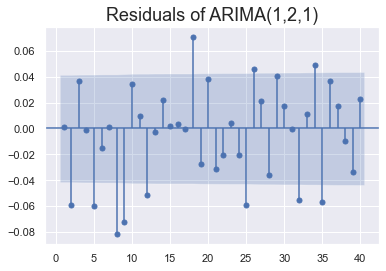

In [15]:
df['res_ar_1_i_2_ma_1'] = results_ar_1_i_2_ma_1.resid
sgt.plot_acf(df.res_ar_1_i_2_ma_1[2:], zero = False, lags = 40)
plt.title('Residuals of ARIMA(1,2,1)', size = 18)
plt.show()

In [16]:
#ARIMA(5,2,5)
model_ar_5_i_2_ma_5 = ARIMA(df.market_value, order=(5,2,5))
results_ar_5_i_2_ma_5 = model_ar_5_i_2_ma_5.fit()
print(results_ar_5_i_2_ma_5.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(5, 2, 5)   Log Likelihood               -8204.783
Method:                       css-mle   S.D. of innovations              9.492
Date:                Mon, 29 Mar 2021   AIC                          16433.565
Time:                        18:51:50   BIC                          16502.109
Sample:                    06-09-2010   HQIC                         16458.592
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.471e-05      0.000      0.283      0.777      -0.001       0.001
ar.L1.D2.market_value    -2.0110      0.051    -39.268      0.000      -2.111      -1.911
ar.L2.D2

In [17]:
#ARIMA(5,2,4)
model_ar_5_i_2_ma_4 = ARIMA(df.market_value, order=(5,2,4))
results_ar_5_i_2_ma_4 = model_ar_5_i_2_ma_4.fit()
print(results_ar_5_i_2_ma_4.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(5, 2, 4)   Log Likelihood               -8206.750
Method:                       css-mle   S.D. of innovations              9.501
Date:                Mon, 29 Mar 2021   AIC                          16435.500
Time:                        18:56:10   BIC                          16498.332
Sample:                    06-09-2010   HQIC                         16458.441
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  8.861e-05      0.000      0.262      0.794      -0.001       0.001
ar.L1.D2.market_value    -1.5154      0.041    -36.599      0.000      -1.597      -1.434
ar.L2.D2

In [18]:
#ARIMA(5,2,3)
model_ar_5_i_2_ma_3 = ARIMA(df.market_value, order=(5,2,3))
results_ar_5_i_2_ma_3 = model_ar_5_i_2_ma_3.fit()
print(results_ar_5_i_2_ma_3.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(5, 2, 3)   Log Likelihood               -8208.632
Method:                       css-mle   S.D. of innovations              9.508
Date:                Mon, 29 Mar 2021   AIC                          16437.264
Time:                        18:57:10   BIC                          16494.384
Sample:                    06-09-2010   HQIC                         16458.120
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.039e-05      0.000      0.273      0.785      -0.001       0.001
ar.L1.D2.market_value    -1.2918      0.022    -58.717      0.000      -1.335      -1.249
ar.L2.D2

In [19]:
#ARIMA(5,2,2)
model_ar_5_i_2_ma_2 = ARIMA(df.market_value, order=(5,2,2))
results_ar_5_i_2_ma_2 = model_ar_5_i_2_ma_2.fit()
print(results_ar_5_i_2_ma_2.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(5, 2, 2)   Log Likelihood               -8214.586
Method:                       css-mle   S.D. of innovations              9.533
Date:                Mon, 29 Mar 2021   AIC                          16447.172
Time:                        18:57:59   BIC                          16498.580
Sample:                    06-09-2010   HQIC                         16465.942
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.389e-05      0.000      0.299      0.765      -0.001       0.001
ar.L1.D2.market_value    -0.9327      0.024    -38.209      0.000      -0.981      -0.885
ar.L2.D2

In [20]:
#ARIMA(5,2,1)
model_ar_5_i_2_ma_1 = ARIMA(df.market_value, order=(5,2,1))
results_ar_5_i_2_ma_1 = model_ar_5_i_2_ma_1.fit()
print(results_ar_5_i_2_ma_1.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(5, 2, 1)   Log Likelihood               -8214.493
Method:                       css-mle   S.D. of innovations              9.533
Date:                Mon, 29 Mar 2021   AIC                          16444.986
Time:                        18:58:25   BIC                          16490.681
Sample:                    06-09-2010   HQIC                         16461.670
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.133e-05      0.000      0.305      0.760      -0.000       0.001
ar.L1.D2.market_value     0.0377      0.021      1.784      0.074      -0.004       0.079
ar.L2.D2

In [21]:
#ARIMA(1,2,5)
model_ar_1_i_2_ma_5 = ARIMA(df.market_value, order=(1,2,5))
results_ar_1_i_2_ma_5 = model_ar_1_i_2_ma_5.fit()
print(results_ar_1_i_2_ma_5.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(1, 2, 5)   Log Likelihood               -8215.188
Method:                       css-mle   S.D. of innovations              9.536
Date:                Mon, 29 Mar 2021   AIC                          16446.377
Time:                        18:58:57   BIC                          16492.073
Sample:                    06-09-2010   HQIC                         16463.061
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.437e-05      0.000      0.295      0.768      -0.001       0.001
ar.L1.D2.market_value    -0.9853      0.010   -102.636      0.000      -1.004      -0.966
ma.L1.D2

In [22]:
#ARIMA(2,2,5)
model_ar_2_i_2_ma_5 = ARIMA(df.market_value, order=(2,2,5))
results_ar_2_i_2_ma_5 = model_ar_2_i_2_ma_5.fit()
print(results_ar_2_i_2_ma_5.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(2, 2, 5)   Log Likelihood               -8211.186
Method:                       css-mle   S.D. of innovations              9.517
Date:                Mon, 29 Mar 2021   AIC                          16440.372
Time:                        18:59:44   BIC                          16491.780
Sample:                    06-09-2010   HQIC                         16459.142
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.347e-05      0.000      0.306      0.760      -0.001       0.001
ar.L1.D2.market_value    -1.3188      0.011   -116.205      0.000      -1.341      -1.297
ar.L2.D2

In [23]:
#ARIMA(3,2,5)
model_ar_3_i_2_ma_5 = ARIMA(df.market_value, order=(3,2,5))
results_ar_3_i_2_ma_5 = model_ar_3_i_2_ma_5.fit()
print(results_ar_3_i_2_ma_5.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(3, 2, 5)   Log Likelihood               -8207.222
Method:                       css-mle   S.D. of innovations              9.502
Date:                Mon, 29 Mar 2021   AIC                          16434.444
Time:                        19:00:20   BIC                          16491.564
Sample:                    06-09-2010   HQIC                         16455.300
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.326e-05      0.000      0.290      0.772      -0.001       0.001
ar.L1.D2.market_value    -1.5720      0.030    -52.633      0.000      -1.631      -1.513
ar.L2.D2

In [24]:
#ARIMA(4,2,5)
model_ar_4_i_2_ma_5 = ARIMA(df.market_value, order=(4,2,5))
results_ar_4_i_2_ma_5 = model_ar_4_i_2_ma_5.fit()
print(results_ar_4_i_2_ma_5.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(4, 2, 5)   Log Likelihood               -8204.318
Method:                       css-mle   S.D. of innovations              9.489
Date:                Mon, 29 Mar 2021   AIC                          16430.637
Time:                        19:01:17   BIC                          16493.469
Sample:                    06-09-2010   HQIC                         16453.578
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.448e-05      0.000      0.301      0.763      -0.001       0.001
ar.L1.D2.market_value    -2.3762      0.152    -15.641      0.000      -2.674      -2.078
ar.L2.D2

In [25]:
#ARIMA(4,2,1)
model_ar_4_i_2_ma_1 = ARIMA(df.market_value, order=(4,2,1))
results_ar_4_i_2_ma_1 = model_ar_4_i_2_ma_1.fit()
print(results_ar_4_i_2_ma_1.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(4, 2, 1)   Log Likelihood               -8218.045
Method:                       css-mle   S.D. of innovations              9.548
Date:                Mon, 29 Mar 2021   AIC                          16450.089
Time:                        19:17:07   BIC                          16490.073
Sample:                    06-09-2010   HQIC                         16464.688
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.516e-05      0.000      0.300      0.764      -0.001       0.001
ar.L1.D2.market_value     0.0381      0.021      1.803      0.071      -0.003       0.080
ar.L2.D2

In [26]:
#ARIMA(4,2,2)
model_ar_4_i_2_ma_2 = ARIMA(df.market_value, order=(4,2,2))
results_ar_4_i_2_ma_2 = model_ar_4_i_2_ma_2.fit()
print(results_ar_4_i_2_ma_2.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(4, 2, 2)   Log Likelihood               -8215.059
Method:                       css-mle   S.D. of innovations              9.535
Date:                Mon, 29 Mar 2021   AIC                          16446.118
Time:                        19:17:55   BIC                          16491.814
Sample:                    06-09-2010   HQIC                         16462.802
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.383e-05      0.000      0.293      0.770      -0.001       0.001
ar.L1.D2.market_value    -0.9353      0.024    -38.753      0.000      -0.983      -0.888
ar.L2.D2

In [27]:
#ARIMA(4,2,3)
model_ar_4_i_2_ma_3 = ARIMA(df.market_value, order=(4,2,3))
results_ar_4_i_2_ma_3 = model_ar_4_i_2_ma_3.fit()
print(results_ar_4_i_2_ma_3.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(4, 2, 3)   Log Likelihood               -8214.881
Method:                       css-mle   S.D. of innovations              9.535
Date:                Mon, 29 Mar 2021   AIC                          16447.762
Time:                        19:18:51   BIC                          16499.170
Sample:                    06-09-2010   HQIC                         16466.532
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.376e-05      0.000      0.294      0.769      -0.001       0.001
ar.L1.D2.market_value    -1.0959      0.277     -3.952      0.000      -1.639      -0.552
ar.L2.D2

In [28]:
#ARIMA(4,2,4)
model_ar_4_i_2_ma_4 = ARIMA(df.market_value, order=(4,2,4))
results_ar_4_i_2_ma_4 = model_ar_4_i_2_ma_4.fit()
print(results_ar_4_i_2_ma_4.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(4, 2, 4)   Log Likelihood               -8207.356
Method:                       css-mle   S.D. of innovations              9.502
Date:                Mon, 29 Mar 2021   AIC                          16434.713
Time:                        19:19:59   BIC                          16491.833
Sample:                    06-09-2010   HQIC                         16455.568
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.387e-05      0.000      0.292      0.770      -0.001       0.001
ar.L1.D2.market_value    -1.5219      0.045    -34.110      0.000      -1.609      -1.434
ar.L2.D2

In [29]:
#ARIMA(3,2,4)
model_ar_3_i_2_ma_4 = ARIMA(df.market_value, order=(3,2,4))
results_ar_3_i_2_ma_4 = model_ar_3_i_2_ma_4.fit()
print(results_ar_3_i_2_ma_4.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(3, 2, 4)   Log Likelihood               -8208.494
Method:                       css-mle   S.D. of innovations              9.507
Date:                Mon, 29 Mar 2021   AIC                          16434.988
Time:                        19:22:15   BIC                          16486.396
Sample:                    06-09-2010   HQIC                         16453.758
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.487e-05      0.000      0.301      0.764      -0.001       0.001
ar.L1.D2.market_value    -1.1265      0.315     -3.574      0.000      -1.744      -0.509
ar.L2.D2

In [30]:
#ARIMA(2,2,4)
model_ar_2_i_2_ma_4 = ARIMA(df.market_value, order=(2,2,4))
results_ar_2_i_2_ma_4 = model_ar_2_i_2_ma_4.fit()
print(results_ar_2_i_2_ma_4.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(2, 2, 4)   Log Likelihood               -8214.912
Method:                       css-mle   S.D. of innovations              9.533
Date:                Mon, 29 Mar 2021   AIC                          16445.824
Time:                        19:23:51   BIC                          16491.520
Sample:                    06-09-2010   HQIC                         16462.508
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.377e-05      0.000      0.290      0.772      -0.001       0.001
ar.L1.D2.market_value    -1.3104      0.015    -89.839      0.000      -1.339      -1.282
ar.L2.D2

In [31]:
#ARIMA(1,2,4)
model_ar_1_i_2_ma_4 = ARIMA(df.market_value, order=(1,2,4))
results_ar_1_i_2_ma_4 = model_ar_1_i_2_ma_4.fit()
print(results_ar_1_i_2_ma_4.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(1, 2, 4)   Log Likelihood               -8217.054
Method:                       css-mle   S.D. of innovations              9.544
Date:                Mon, 29 Mar 2021   AIC                          16448.109
Time:                        19:25:03   BIC                          16488.093
Sample:                    06-09-2010   HQIC                         16462.708
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.458e-05      0.000      0.310      0.757      -0.001       0.001
ar.L1.D2.market_value    -0.9860      0.010   -103.146      0.000      -1.005      -0.967
ma.L1.D2

In [33]:
#ARIMA(3,2,1)
model_ar_3_i_2_ma_1 = ARIMA(df.market_value, order=(3,2,1))
results_ar_3_i_2_ma_1 = model_ar_3_i_2_ma_1.fit()
print(results_ar_3_i_2_ma_1.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(3, 2, 1)   Log Likelihood               -8218.102
Method:                       css-mle   S.D. of innovations              9.548
Date:                Mon, 29 Mar 2021   AIC                          16448.203
Time:                        20:47:06   BIC                          16482.475
Sample:                    06-09-2010   HQIC                         16460.717
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.519e-05      0.000      0.299      0.765      -0.001       0.001
ar.L1.D2.market_value     0.0378      0.021      1.790      0.073      -0.004       0.079
ar.L2.D2

In [35]:
#ARIMA(3,2,2)
model_ar_3_i_2_ma_2 = ARIMA(df.market_value, order=(3,2,2))
results_ar_3_i_2_ma_2 = model_ar_3_i_2_ma_2.fit()
print(results_ar_3_i_2_ma_2.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -8218.086
Method:                       css-mle   S.D. of innovations              9.548
Date:                Mon, 29 Mar 2021   AIC                          16450.172
Time:                        20:48:23   BIC                          16490.156
Sample:                    06-09-2010   HQIC                         16464.771
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   9.52e-05      0.000      0.299      0.765      -0.001       0.001
ar.L1.D2.market_value    -0.0109        nan        nan        nan         nan         nan
ar.L2.D2

In [38]:
#ARIMA(3,2,3)
model_ar_3_i_2_ma_3 = ARIMA(df.market_value, order=(3,2,3))
results_ar_3_i_2_ma_3 = model_ar_3_i_2_ma_3.fit()
print(results_ar_3_i_2_ma_3.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(3, 2, 3)   Log Likelihood               -8208.963
Method:                       css-mle   S.D. of innovations              9.509
Date:                Mon, 29 Mar 2021   AIC                          16433.926
Time:                        20:53:42   BIC                          16479.622
Sample:                    06-09-2010   HQIC                         16450.611
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.486e-05      0.000      0.296      0.767      -0.001       0.001
ar.L1.D2.market_value    -0.5460      0.042    -13.107      0.000      -0.628      -0.464
ar.L2.D2

In [39]:
#ARIMA(1,2,3)
model_ar_1_i_2_ma_3 = ARIMA(df.market_value, order=(1,2,3))
results_ar_1_i_2_ma_3 = model_ar_1_i_2_ma_3.fit()
print(results_ar_1_i_2_ma_3.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(1, 2, 3)   Log Likelihood               -8218.869
Method:                       css-mle   S.D. of innovations              9.551
Date:                Mon, 29 Mar 2021   AIC                          16449.738
Time:                        20:56:22   BIC                          16484.010
Sample:                    06-09-2010   HQIC                         16462.251
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.721e-05      0.000      0.313      0.754      -0.001       0.001
ar.L1.D2.market_value    -0.2698      0.246     -1.095      0.273      -0.753       0.213
ma.L1.D2

In [40]:
#ARIMA(2,2,3)
model_ar_2_i_2_ma_3 = ARIMA(df.market_value, order=(2,2,3))
results_ar_2_i_2_ma_3 = model_ar_2_i_2_ma_3.fit()
print(results_ar_2_i_2_ma_3.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(2, 2, 3)   Log Likelihood               -8210.412
Method:                       css-mle   S.D. of innovations              9.515
Date:                Mon, 29 Mar 2021   AIC                          16434.823
Time:                        20:57:38   BIC                          16474.807
Sample:                    06-09-2010   HQIC                         16449.422
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.577e-05      0.000      0.310      0.756      -0.001       0.001
ar.L1.D2.market_value    -0.6035      0.030    -20.162      0.000      -0.662      -0.545
ar.L2.D2

In [41]:
#ARIMA(2,2,2)
model_ar_2_i_2_ma_2 = ARIMA(df.market_value, order=(2,2,2))
results_ar_2_i_2_ma_2 = model_ar_2_i_2_ma_2.fit()
print(results_ar_2_i_2_ma_2.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -8218.701
Method:                       css-mle   S.D. of innovations              9.551
Date:                Mon, 29 Mar 2021   AIC                          16449.403
Time:                        20:59:26   BIC                          16483.675
Sample:                    06-09-2010   HQIC                         16461.916
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.559e-05      0.000      0.308      0.758      -0.001       0.001
ar.L1.D2.market_value    -0.3091      0.211     -1.463      0.143      -0.723       0.105
ar.L2.D2

In [42]:
#ARIMA(2,2,3)
model_ar_2_i_2_ma_3 = ARIMA(df.market_value, order=(2,2,3))
results_ar_2_i_2_ma_3 = model_ar_2_i_2_ma_3.fit()
print(results_ar_2_i_2_ma_3.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(2, 2, 3)   Log Likelihood               -8210.412
Method:                       css-mle   S.D. of innovations              9.515
Date:                Mon, 29 Mar 2021   AIC                          16434.823
Time:                        21:00:39   BIC                          16474.807
Sample:                    06-09-2010   HQIC                         16449.422
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.577e-05      0.000      0.310      0.756      -0.001       0.001
ar.L1.D2.market_value    -0.6035      0.030    -20.162      0.000      -0.662      -0.545
ar.L2.D2

In [43]:
#ARIMA(2,2,4)
model_ar_2_i_2_ma_4 = ARIMA(df.market_value, order=(2,2,4))
results_ar_2_i_2_ma_4 = model_ar_2_i_2_ma_4.fit()
print(results_ar_2_i_2_ma_4.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(2, 2, 4)   Log Likelihood               -8214.912
Method:                       css-mle   S.D. of innovations              9.533
Date:                Mon, 29 Mar 2021   AIC                          16445.824
Time:                        21:01:42   BIC                          16491.520
Sample:                    06-09-2010   HQIC                         16462.508
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.377e-05      0.000      0.290      0.772      -0.001       0.001
ar.L1.D2.market_value    -1.3104      0.015    -89.839      0.000      -1.339      -1.282
ar.L2.D2

In [44]:
#ARIMA(3,2,2)
model_ar_3_i_2_ma_2 = ARIMA(df.market_value, order=(3,2,2))
results_ar_3_i_2_ma_2 = model_ar_3_i_2_ma_2.fit()
print(results_ar_3_i_2_ma_2.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -8218.086
Method:                       css-mle   S.D. of innovations              9.548
Date:                Mon, 29 Mar 2021   AIC                          16450.172
Time:                        21:04:49   BIC                          16490.156
Sample:                    06-09-2010   HQIC                         16464.771
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   9.52e-05      0.000      0.299      0.765      -0.001       0.001
ar.L1.D2.market_value    -0.0109        nan        nan        nan         nan         nan
ar.L2.D2

In [45]:
#ARIMA(1,2,2)
model_ar_1_i_2_ma_2 = ARIMA(df.market_value, order=(1,2,2))
results_ar_1_i_2_ma_2 = model_ar_1_i_2_ma_2.fit()
print(results_ar_1_i_2_ma_2.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -8220.341
Method:                       css-mle   S.D. of innovations              9.558
Date:                Mon, 29 Mar 2021   AIC                          16450.682
Time:                        21:07:38   BIC                          16479.242
Sample:                    06-09-2010   HQIC                         16461.109
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0001      0.000      0.315      0.753      -0.001       0.001
ar.L1.D2.market_value    -0.5690      0.156     -3.658      0.000      -0.874      -0.264
ma.L1.D2

In [46]:
#ARIMA(1,2,1)
model_ar_1_i_2_ma_1 = ARIMA(df.market_value, order=(1,2,1))
results_ar_1_i_2_ma_1 = model_ar_1_i_2_ma_1.fit()
print(results_ar_1_i_2_ma_1.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -8223.443
Method:                       css-mle   S.D. of innovations              9.571
Date:                Mon, 29 Mar 2021   AIC                          16454.886
Time:                        21:09:02   BIC                          16477.734
Sample:                    06-09-2010   HQIC                         16463.228
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   9.59e-05      0.000      0.295      0.768      -0.001       0.001
ar.L1.D2.market_value     0.0337      0.021      1.595      0.111      -0.008       0.075
ma.L1.D2

In [47]:
#ARIMA(1,2,2)
model_ar_1_i_2_ma_2 = ARIMA(df.market_value, order=(1,2,2))
results_ar_1_i_2_ma_2 = model_ar_1_i_2_ma_2.fit()
print(results_ar_1_i_2_ma_2.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -8220.341
Method:                       css-mle   S.D. of innovations              9.558
Date:                Mon, 29 Mar 2021   AIC                          16450.682
Time:                        21:13:04   BIC                          16479.242
Sample:                    06-09-2010   HQIC                         16461.109
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0001      0.000      0.315      0.753      -0.001       0.001
ar.L1.D2.market_value    -0.5690      0.156     -3.658      0.000      -0.874      -0.264
ma.L1.D2

In [48]:
#ARIMA(1,2,4)
model_ar_1_i_2_ma_4 = ARIMA(df.market_value, order=(1,2,4))
results_ar_1_i_2_ma_4 = model_ar_1_i_2_ma_4.fit()
print(results_ar_1_i_2_ma_4.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(1, 2, 4)   Log Likelihood               -8217.054
Method:                       css-mle   S.D. of innovations              9.544
Date:                Mon, 29 Mar 2021   AIC                          16448.109
Time:                        21:14:54   BIC                          16488.093
Sample:                    06-09-2010   HQIC                         16462.708
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.458e-05      0.000      0.310      0.757      -0.001       0.001
ar.L1.D2.market_value    -0.9860      0.010   -103.146      0.000      -1.005      -0.967
ma.L1.D2

In [49]:
#ARIMA(1,2,5)
model_ar_1_i_2_ma_5 = ARIMA(df.market_value, order=(1,2,5))
results_ar_1_i_2_ma_5 = model_ar_1_i_2_ma_5.fit()
print(results_ar_1_i_2_ma_5.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(1, 2, 5)   Log Likelihood               -8215.188
Method:                       css-mle   S.D. of innovations              9.536
Date:                Mon, 29 Mar 2021   AIC                          16446.377
Time:                        21:16:57   BIC                          16492.073
Sample:                    06-09-2010   HQIC                         16463.061
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.437e-05      0.000      0.295      0.768      -0.001       0.001
ar.L1.D2.market_value    -0.9853      0.010   -102.636      0.000      -1.004      -0.966
ma.L1.D2

In [55]:
#Best Models
#(4,2,1),(4,2,4),(3,2,3),(2,2,3),(1,2,2)
print('\t ARIMA(4,2,4): \t LLR : ', results_ar_4_i_2_ma_4.llf, '\t AIC: ', results_ar_4_i_2_ma_4.aic)
print('\t ARIMA(3,2,3): \t LLR : ', results_ar_3_i_2_ma_3.llf, '\t AIC: ', results_ar_3_i_2_ma_3.aic)
print('\t ARIMA(2,2,3): \t LLR : ', results_ar_2_i_2_ma_3.llf, '\t AIC: ', results_ar_2_i_2_ma_3.aic)
print('\t ARIMA(1,2,2): \t LLR : ', results_ar_1_i_2_ma_2.llf, '\t AIC: ', results_ar_1_i_2_ma_2.aic)

	 ARIMA(4,2,4): 	 LLR :  -8207.35629794157 	 AIC:  16434.71259588314
	 ARIMA(3,2,3): 	 LLR :  -8208.96318073307 	 AIC:  16433.92636146614
	 ARIMA(2,2,3): 	 LLR :  -8210.41152055109 	 AIC:  16434.82304110218
	 ARIMA(1,2,2): 	 LLR :  -8220.340786130108 	 AIC:  16450.681572260215


In [53]:
print(results_ar_1_i_2_ma_2.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 2235
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -8220.341
Method:                       css-mle   S.D. of innovations              9.558
Date:                Mon, 29 Mar 2021   AIC                          16450.682
Time:                        21:32:44   BIC                          16479.242
Sample:                    06-09-2010   HQIC                         16461.109
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0001      0.000      0.315      0.753      -0.001       0.001
ar.L1.D2.market_value    -0.5690      0.156     -3.658      0.000      -0.874      -0.264
ma.L1.D2

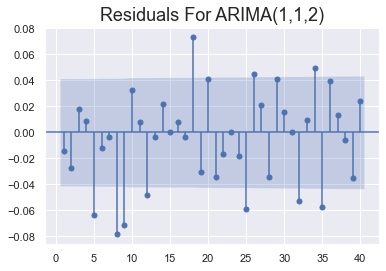

In [57]:
df['res_ar_1_i_2_ma_2'] = results_ar_1_i_2_ma_2.resid
sgt.plot_acf(df.res_ar_1_i_2_ma_2[2:], zero = False, lags = 40)
plt.title('Residuals For ARIMA(1,1,2)', size = 18)
plt.show()